In [164]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import itertools
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import streamlit as st

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords  
stop_words= stopwords.words('english')

[nltk_data] Downloading package punkt to /home/rajiv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rajiv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [165]:
df = pd.read_csv('archive/netflix_titles.csv' )
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [166]:


t1 = df.type.value_counts()

fig = go.Figure()
fig.add_pie(name='', 
            values=t1.values, 
            labels=t1.index, 
            text=t1.index,
            )
fig.update_layout(title={'text':'Movie vs TV Show: Pie Chart',},
                  font_size=18)
fig.show()


In [167]:


t2 = df.groupby(pd.to_datetime(df['date_added']).map(lambda x:x.year))['type'].agg('describe')
t2['movies'] = t2.freq
t2.drop(columns=['top', 'freq', 'unique'], inplace=True)
t2['tv_shows'] = t2['count'] - t2.movies



fig = go.Figure()
fig.add_scatter(x=t2.index, 
                y=t2.tv_shows, 
                fill='tonexty',
                name='TV Shows',
                line_color='rgb(25,25,255)'
               )
fig.add_scatter(x=t2.index, 
                y=t2.movies, 
                fill='tonexty',
                name='Movies',
                line_color='rgb(77,195,255)'
               )
fig.add_scatter(x=t2.index, 
                y=t2['count'], 
                line_color='black', 
                line_dash='dash',
                opacity=.5,
                name='Total',
               )
fig.update_traces(mode='lines')
fig.update_layout(title_text='New Content added over time',
                  title_font_size=24,
                  xaxis_title='Year',
                  yaxis_title='New Content added',
                  hovermode="x unified")

fig.show()



In [168]:
list_cats = df.listed_in.str.split(', ').tolist()
flatten = itertools.chain.from_iterable(list_cats)
cats_counter = dict(Counter(flatten))
cats_counter = {k:v for k,v in sorted(cats_counter.items(), key=lambda e:e[1], reverse=True)}
cat_list = list(cats_counter.keys())[:10][::-1]
num_list = list(cats_counter.values())[:10][::-1]


fig = go.Figure()
fig.add_bar(x=num_list,
            y=cat_list,
            orientation='h',
            hovertemplate='Category: %{y}<br>Total: %{x}',
            name='')
fig.update_layout(title_text='Top 10 Categories',
                  title_font_size=24,
                  xaxis_title_text='Total')
fig.show()

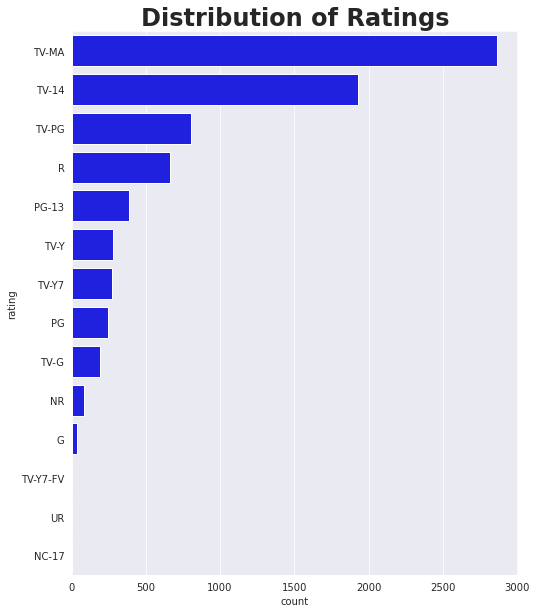

In [169]:
plt.figure(figsize=(8, 10))
sns.countplot(y='rating', data=df, order=df.rating.value_counts().index.to_list(), color='Blue')
plt.title('Distribution of Ratings', fontsize=24, fontweight='bold');

Text(0, 0.5, 'No.of Shows')

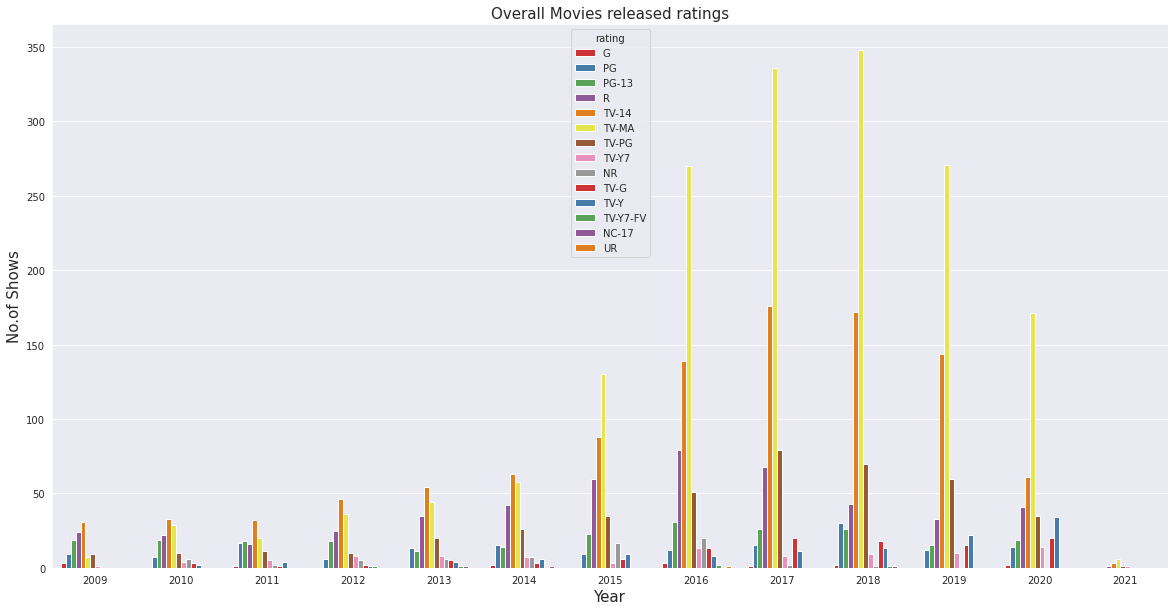

In [170]:


df_temp = df[(df['type'] == 'Movie') & (df['release_year'] > 2008) ]
movie_rating = df_temp.groupby(['release_year','rating']).size().reset_index(name = 'Total')

plt.figure(figsize = (20,10))
sns.set_style('darkgrid')
sns.barplot(data = movie_rating,x = 'release_year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('Overall Movies released ratings',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('No.of Shows',fontsize = 15)



Text(0, 0.5, 'No.of Shows')

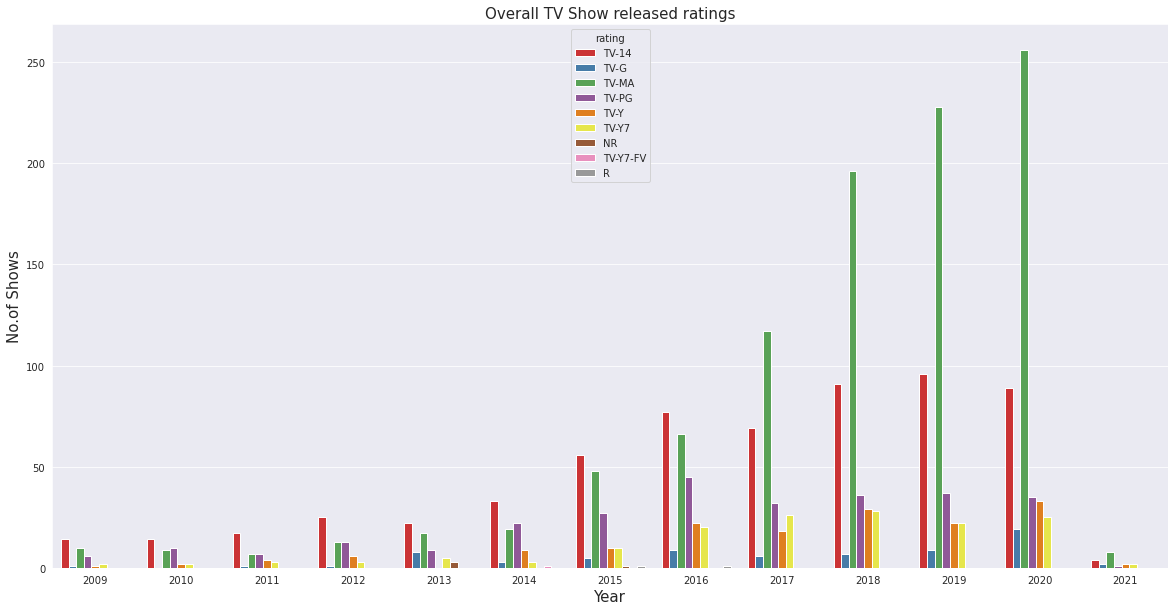

In [171]:


df_temp = df[(df['type'] == 'TV Show') & (df['release_year'] > 2008) ]
tv_ratings = df_temp.groupby(['release_year','rating']).size().reset_index(name = 'Total')

plt.figure(figsize = (20,10))
sns.set_style('darkgrid')
sns.barplot(data = tv_ratings,x = 'release_year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('Overall TV Show released ratings',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('No.of Shows',fontsize = 15)


Text(0, 0.5, 'No.of Shows')

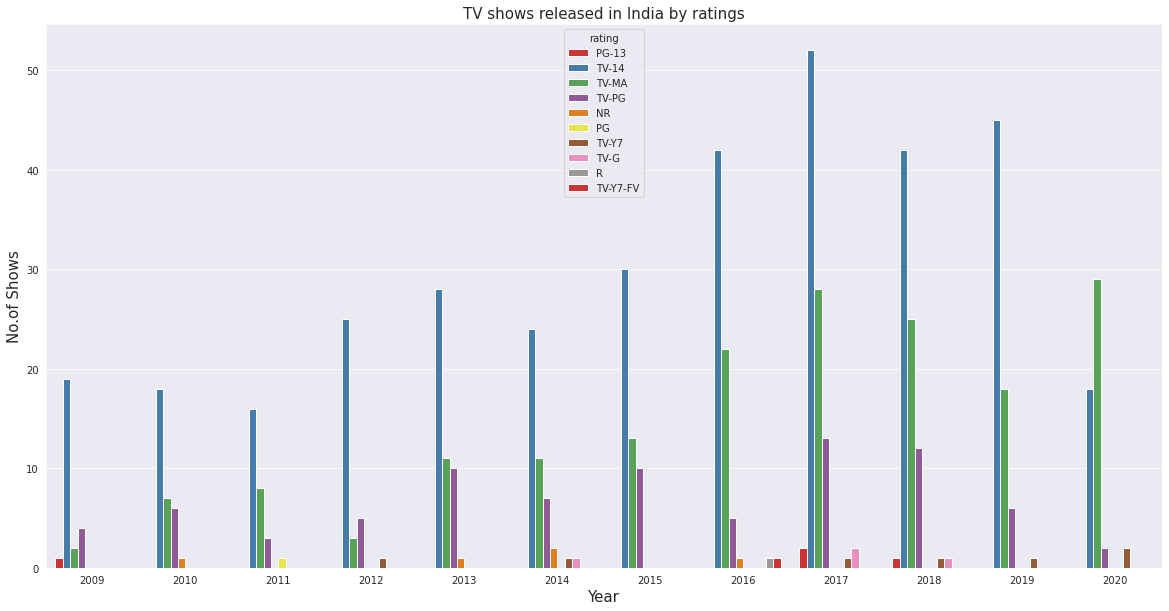

In [172]:


df_temp = df[(df['type'] == 'Movie') & (df['country'] == 'India') & (df['release_year'] > 2008) ]
india_movie = df_temp.groupby(['release_year','rating']).size().reset_index(name = 'Total')

plt.figure(figsize = (20,10))
sns.set_style('darkgrid')
sns.barplot(data = india_movie,x = 'release_year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('TV shows released in India by ratings',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('No.of Shows',fontsize = 15)



Text(0, 0.5, 'No.of Shows')

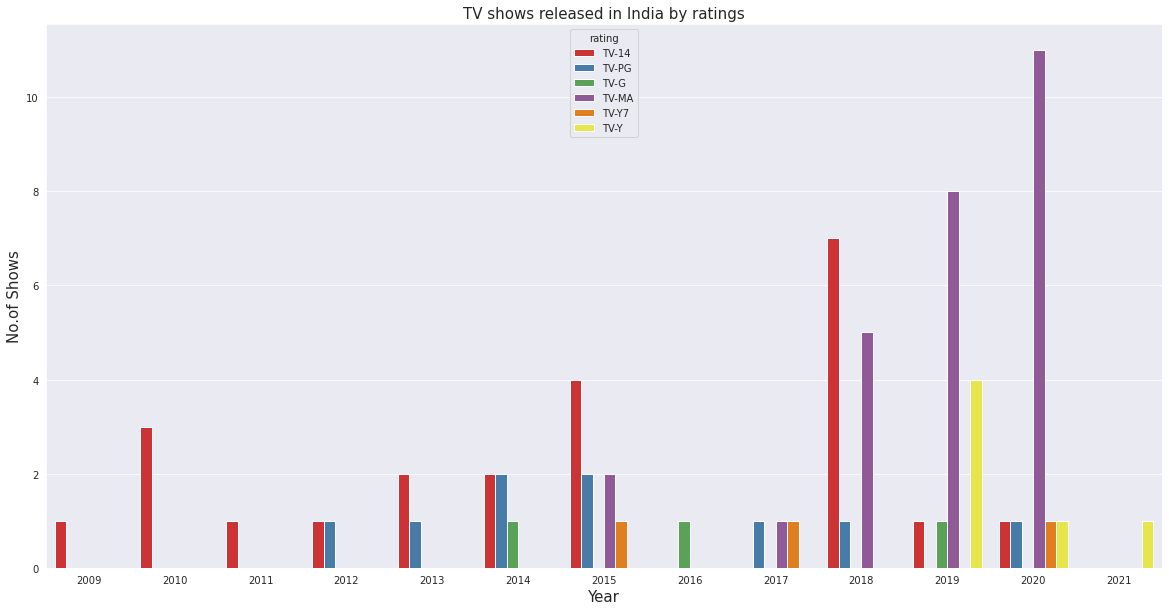

In [173]:


df_temp = df[(df['type'] == 'TV Show') & (df['country'] == 'India') ]
india_tv = df_temp.groupby(['release_year','rating']).size().reset_index(name = 'Total')

plt.figure(figsize = (20,10))
sns.set_style('darkgrid')
sns.barplot(data = india_tv,x = 'release_year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('TV shows released in India by ratings',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('No.of Shows',fontsize = 15)




Text(0, 0.5, 'No.of Shows')

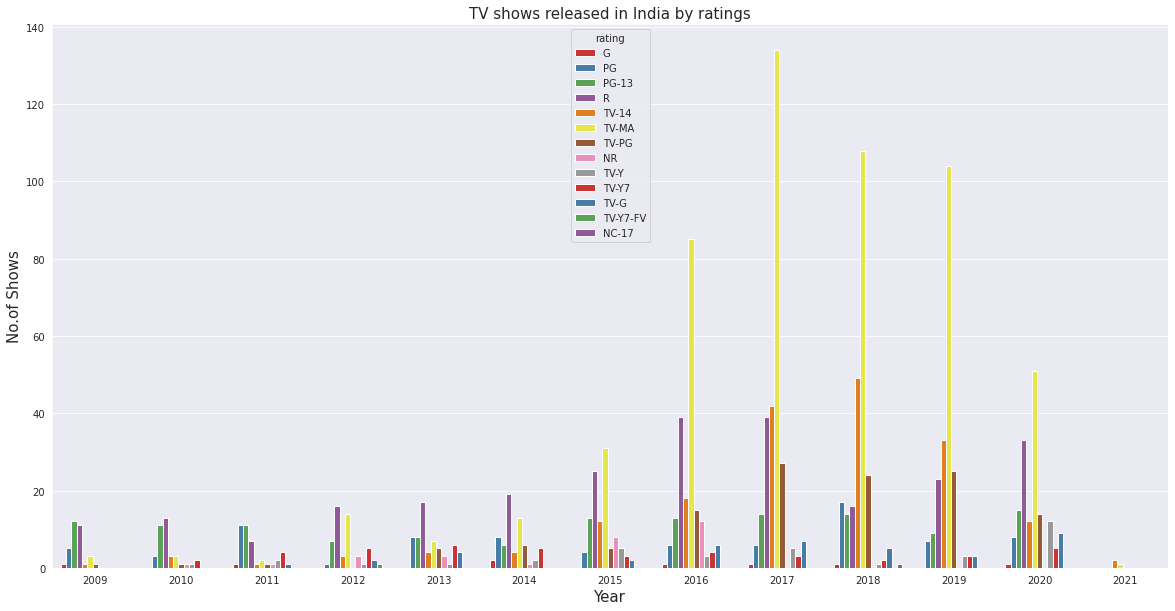

In [174]:

df_temp = df[(df['type'] == 'Movie') & (df['country'] == 'United States') & (df['release_year'] > 2008) ]
usa_movie = df_temp.groupby(['release_year','rating']).size().reset_index(name = 'Total')

plt.figure(figsize = (20,10))
sns.set_style('darkgrid')
sns.barplot(data = usa_movie,x = 'release_year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('TV shows released in India by ratings',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('No.of Shows',fontsize = 15)



Text(0, 0.5, 'No.of Shows')

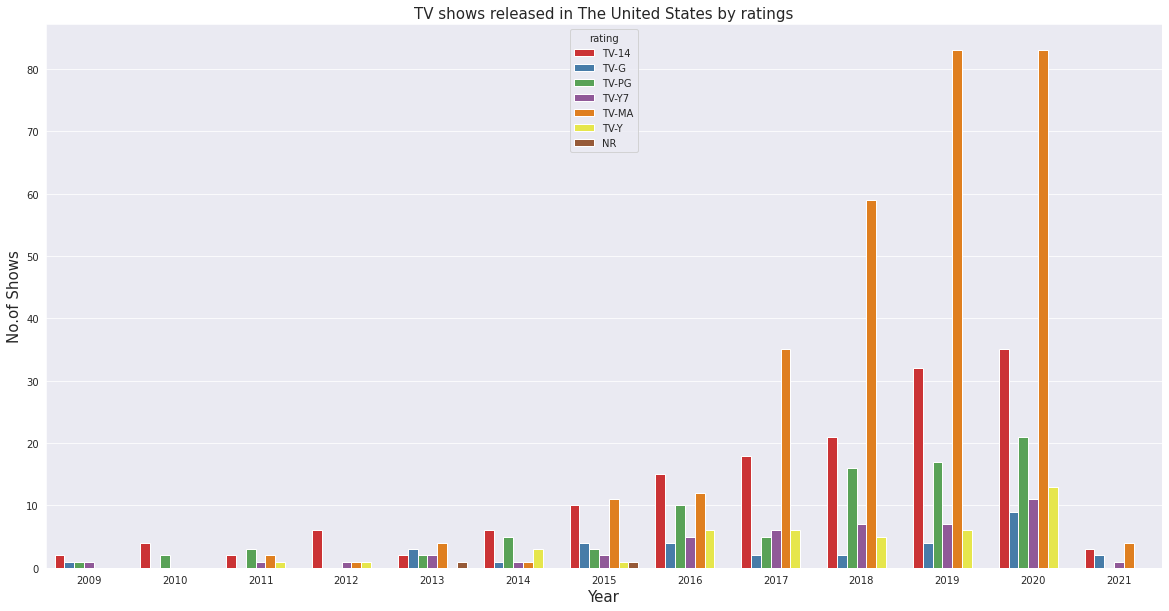

In [175]:

df_temp = df[(df['type'] == 'TV Show') & (df['country'] == 'United States') & (df['release_year'] > 2008) ]
usa_tv = df_temp.groupby(['release_year','rating']).size().reset_index(name = 'Total')

plt.figure(figsize = (20,10))
sns.set_style('darkgrid')
sns.barplot(data = usa_tv,x = 'release_year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('TV shows released in The United States by ratings',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('No.of Shows',fontsize = 15)



<AxesSubplot:xlabel='release_year'>

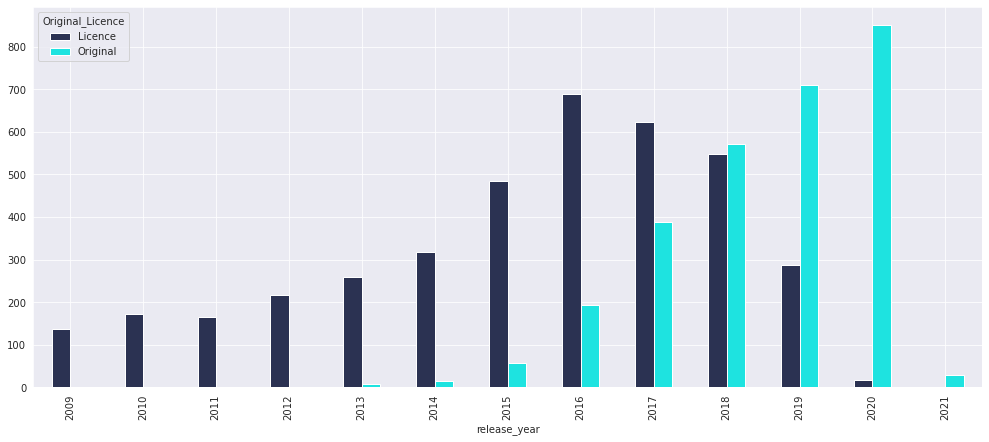

In [176]:
df['date_added_year']=df['date_added'].str.split(', ', n = 1, expand = True)[1]
df['date_added_year'].fillna(0,inplace=True)
df['date_added_year'] = df['date_added_year'].astype('int64')
df['release_year'] = df['release_year'].astype('int64')
df['Original_Licence'] = df['release_year'] == df['date_added_year']
d = {True :'Original', False:'Licence'}
df['Original_Licence'] =df['Original_Licence'].map(d)

#2008 is choose as release year filter, as first netflix show was release in 2009.
pivot = df[df['release_year'] >2008].pivot_table('show_id',index='release_year',columns='Original_Licence',aggfunc='count',fill_value=0)
pivot.plot(kind='bar',figsize=(17, 7),color=['#2b3252','#1ee3e0'])

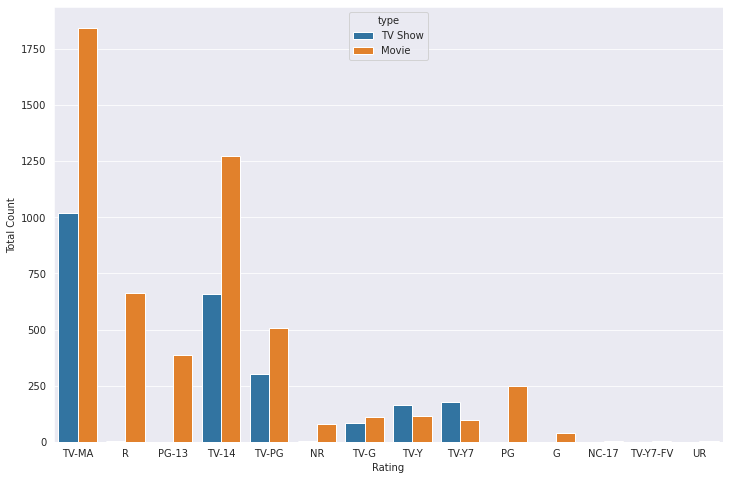

In [177]:
#Type - rating 
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df,hue='type',)
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

In [178]:
df['date_added'] = df['date_added'].fillna('No data')
df['month_added'] = df['date_added'].apply(lambda x: x.split(' ')[0])

content_by_month = df.query('month_added != "No" & month_added != ""')\
.groupby('month_added').agg({'type': 'count'}).reset_index()\
.rename(columns = {'type': 'content'}).sort_values('content', ascending = False)

content_by_month

,month_added,content
2,December,817
10,October,780
4,January,746
9,November,730
7,March,661
11,September,614
1,August,612
0,April,596
5,July,592
6,June,538


In [179]:

fig = px.pie(names = content_by_month['month_added'],values=content_by_month['content'],color_discrete_sequence=px.colors.sequential.deep_r)

fig.show()



New content is most often added in the early winter, and least often added in the summer.


In [180]:


films_genres = pd.DataFrame(columns = ['genre', 'count'], index = range(7))
films_genres.iloc[0, 0] = 'Dramas'
films_genres.iloc[0, 1] = df.listed_in.str.contains('Dramas').sum()
films_genres.iloc[1, 0] = 'Comedies'
films_genres.iloc[1, 1] = df.listed_in.str.contains('Comedies').sum()
films_genres.iloc[2, 0] = 'Action & Adventure'
films_genres.iloc[2, 1] =  df.listed_in.str.contains('Action & Adventure').sum()
films_genres.iloc[3, 0] = 'Documentaries'
films_genres.iloc[3, 1] =  df.listed_in.str.contains('Documentaries').sum()
films_genres.iloc[4, 0] = 'Thrillers'
films_genres.iloc[4, 1] = df.listed_in.str.contains('Thrillers').sum()
films_genres.iloc[5, 0] = 'Horror Movies'
films_genres.iloc[5, 1] =  df.listed_in.str.contains('Horror Movies').sum()
films_genres.iloc[6, 0] = 'Sci-Fi & Fantasy'
films_genres.iloc[6, 1] =  df.listed_in.str.contains('Sci-Fi & Fantasy').sum()

films_genres



,genre,count
0,Dramas,2810
1,Comedies,1996
2,Action & Adventure,871
3,Documentaries,786
4,Thrillers,541
5,Horror Movies,312
6,Sci-Fi & Fantasy,294


Text(0.5, 1.0, 'Total Tv Show Season wise')

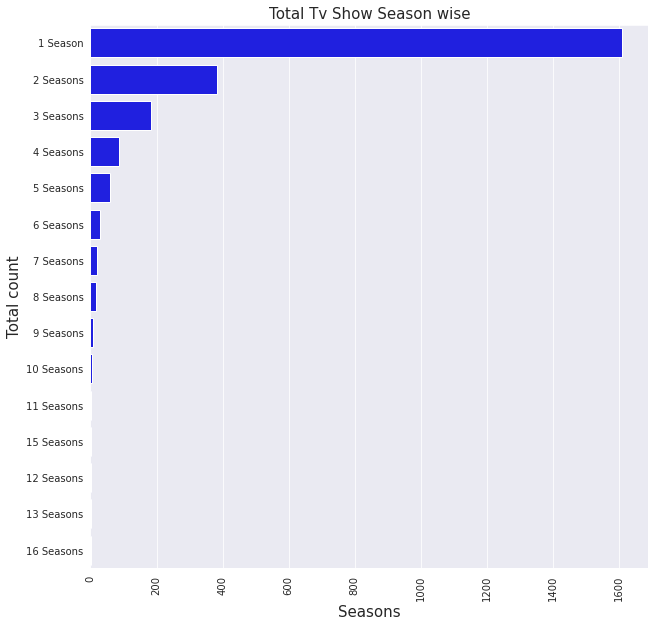

In [181]:


plt.figure(figsize= (10,10))
tv_show = df[df['type']== 'TV Show']

sns.countplot(y = 'duration',data = tv_show,color='Blue', order = tv_show['duration'].value_counts().index,orient='vertical')
plt.xticks(rotation = 90)
plt.xlabel("Seasons",fontsize = 15)
plt.ylabel("Total count",fontsize = 15)
plt.title("Total Tv Show Season wise",fontsize = 15)

In [182]:
data_movie = df[df['type']== 'Movie']

trace0 = go.Box(
    y = data_movie.duration,
    name = "Duration of Movies",
    marker_color='Blue'
)
data2 = [trace0]
iplot(data2)

In [183]:


df['age_group'] = df['rating']
MR_age = {'TV-MA': 'Adults',
          'R': 'Adults',
          'PG-13': 'Teens',
          'TV-14': 'Young Adults',
          'TV-PG': 'Older Kids',
          'NR': 'Adults',
          'TV-G': 'Kids',
          'TV-Y': 'Kids',
          'TV-Y7': 'Older Kids',
          'PG': 'Older Kids',
          'G': 'Kids',
          'NC-17': 'Adults',
          'TV-Y7-FV': 'Older Kids',
          'UR': 'Adults'}
df['age_group'] = df['age_group'].map(MR_age)

val = df['age_group'].value_counts().index
cnt = df['age_group'].value_counts().values

fig = go.Figure([go.Bar(x=val, y=cnt, marker_color='blue')])
fig.update_layout(title_text='Age Group Distribution', title_x=0.5)
fig.show()



In [184]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(df)


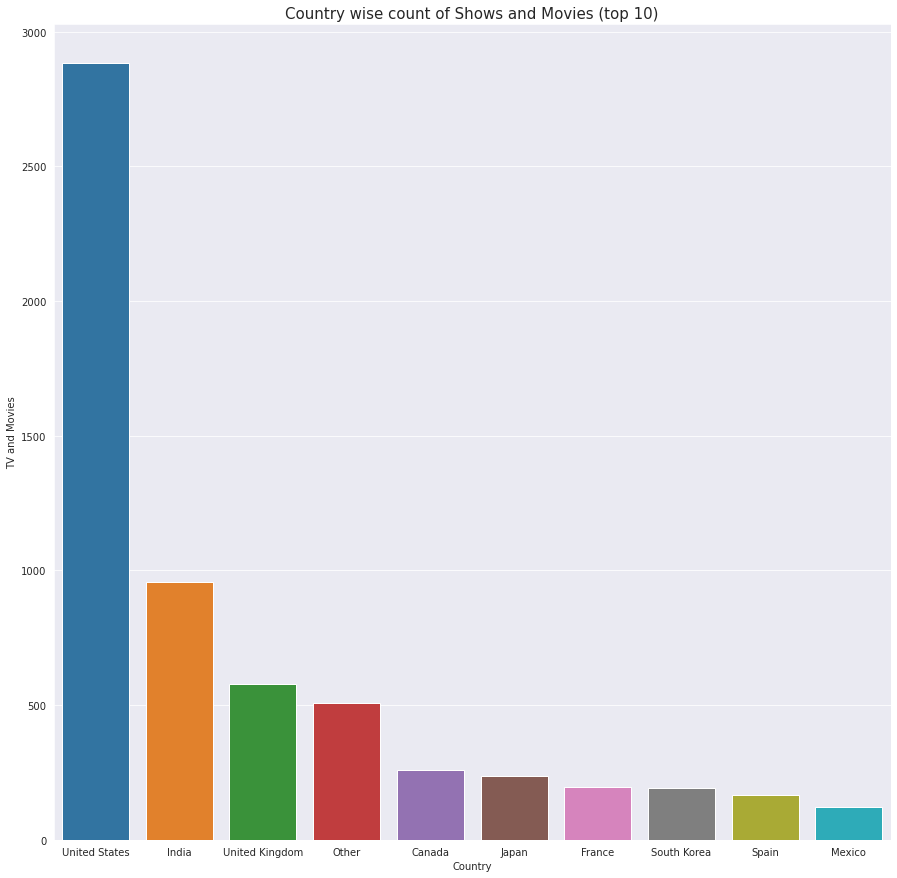

In [185]:

df['country'] = df['country'].fillna('Other')
df['country'].isna().sum()
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])
df.drop('country',axis=1, inplace=True)


count = df.groupby(['main_country']).count()
most_country = count['type'].to_frame().reset_index().sort_values(by='type', ascending=False)[:10]

plt.figure(figsize=(15,15))
sns.barplot(x='main_country', y='type', data=most_country)
plt.ylabel('TV and Movies')
plt.xlabel('Country')
plt.title("Country wise count of Shows and Movies production (top 10)",fontsize = 15)

plt.show()

In [186]:
country_order = df['main_country'].value_counts()[:11].index
data_q2q3 = df[['type', 'main_country']].groupby('main_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]


<BarContainer object of 11 artists>

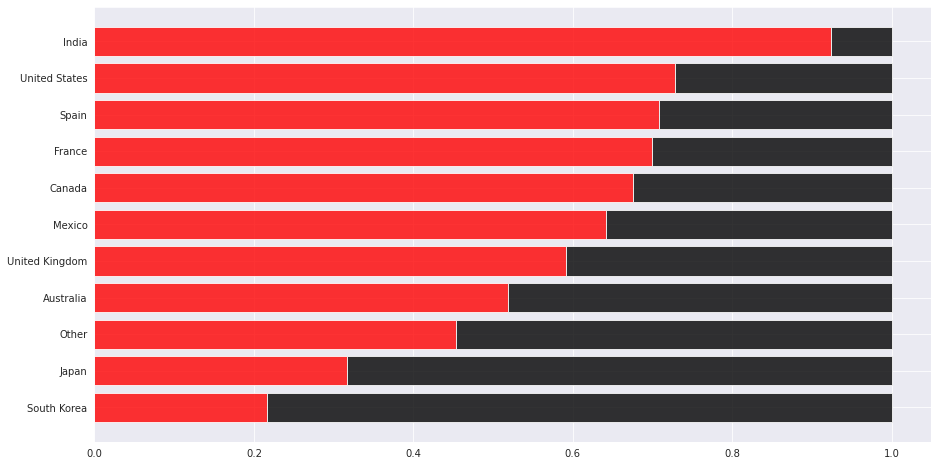

In [187]:
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='red', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='black', alpha=0.8, label='TV Show')

In [188]:
dataRating = df

In [189]:
df['cast']=df['cast'].fillna('Unknown')
df['director']=df['director'].fillna('Unknown')
#combining all fields which will be used for recomendation
df['CombinedField']=df['cast']+' '+df['director']+' '+df['listed_in']+' '+df['description']
modifiedCOrpus=[]

In [190]:
#tokenizing all words.
corpus = df['CombinedField'].apply(lambda x:word_tokenize(x))
listcorpus = list(corpus)
modifiedCOrpus = []
#pre processing words, by lowering it, removing symbolls and removing stop words
for desc in listcorpus:
    stmt = []
    for i in desc:
        if i.lower() not in  stop_words:
            if i.lower() not in ['.',',','â€',':','""']:
                stmt.append(i.lower())
    modifiedCOrpus.append(' '.join(stmt))

In [191]:
tfdifVect = TfidfVectorizer(stop_words='english',lowercase=True)
corpus = modifiedCOrpus
tfdifCorpus = tfdifVect.fit_transform(corpus)

In [192]:
cossineSim = cosine_similarity(tfdifCorpus,tfdifCorpus)
def get_recommendations(title):
    indices = pd.Series(df.index, index=df['title']).drop_duplicates()
    try:
        idx = indices[title]
        # Get the pairwsie similarity scores of all movies with that movie
        sim_scores = list(enumerate(cossineSim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Get the scores of the 10 most similar movies
        sim_scores = sim_scores[1:11]
        movie_indices = [i[0] for i in sim_scores]
        print(df['title'].iloc[movie_indices])
    except:
        print('No such movie found')

In [193]:
get_recommendations('ABCD 2')

279                  ABCD: Any Body Can Dance
172                             A Flying Jatt
1287                          Chashme Buddoor
1508                       Country Ever After
1271                          Chance Pe Dance
4550    Numero Zero. The Roots of Italian Rap
2500                     Gori Tere Pyaar Mein
3234                                 Judwaa 2
7567                          What We Started
3500                             LA Originals
Name: title, dtype: object


In [194]:
df.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,date_added_year,Original_Licence,month_added,age_group,main_country,CombinedField
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...","August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,Original,August,Adults,Brazil,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,Original,December,Adults,Mexico,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,Licence,December,Adults,Singapore,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...","November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,Licence,November,Teens,United States,"Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...","January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,Licence,January,Teens,United States,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."
